In [203]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import export_text

In [204]:
df = pd.read_csv('./data/wineQT.csv')

In [205]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [206]:
df.shape

(1143, 13)

In [207]:
kvalitet = df['quality'].unique()
print(f"Quality har ett värde mellan {kvalitet.min()} - {kvalitet.max()} som indikerar hur bra dom är")

Quality har ett värde mellan 3 - 8 som indikerar hur bra dom är


fixed acidity


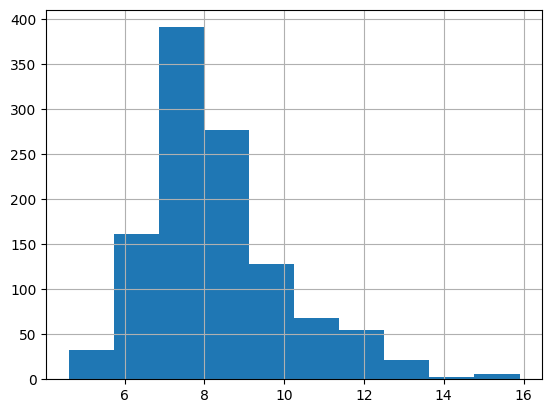

volatile acidity


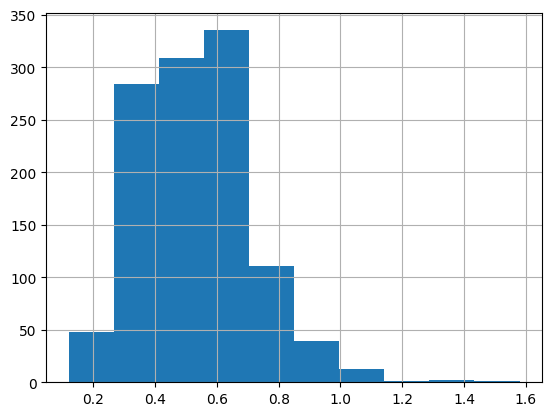

citric acid


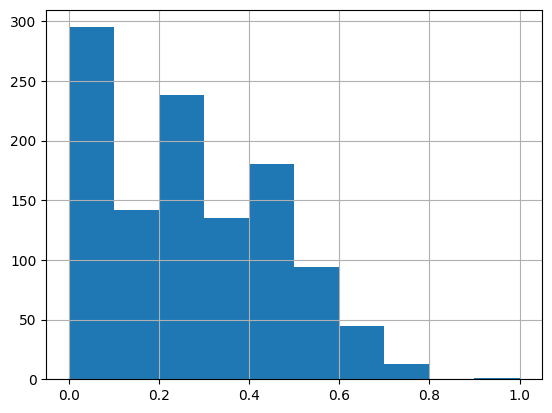

residual sugar


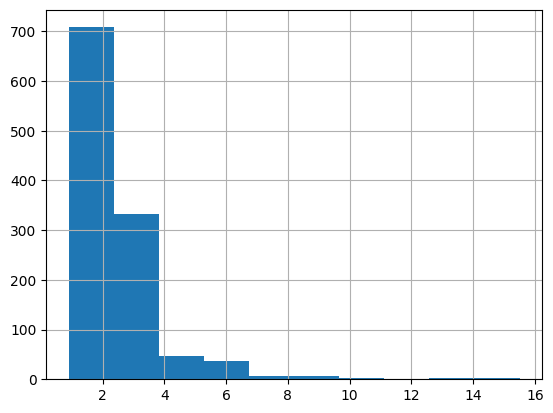

chlorides


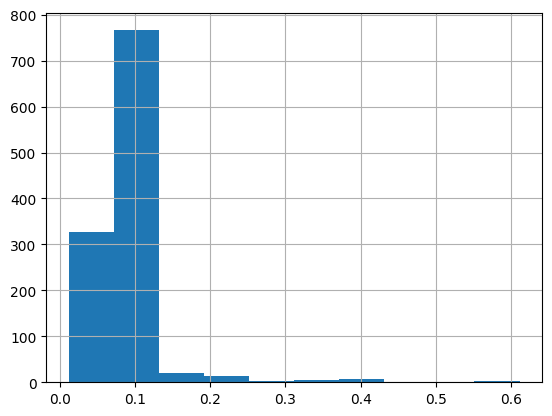

free sulfur dioxide


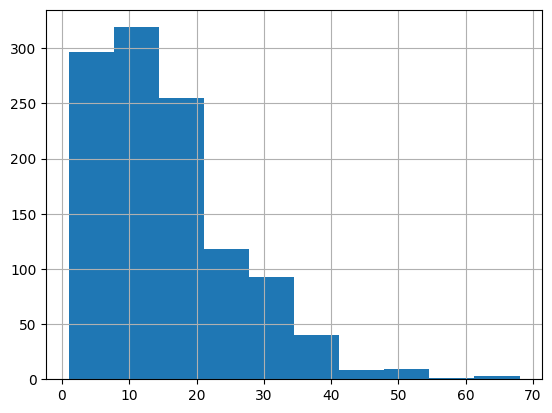

total sulfur dioxide


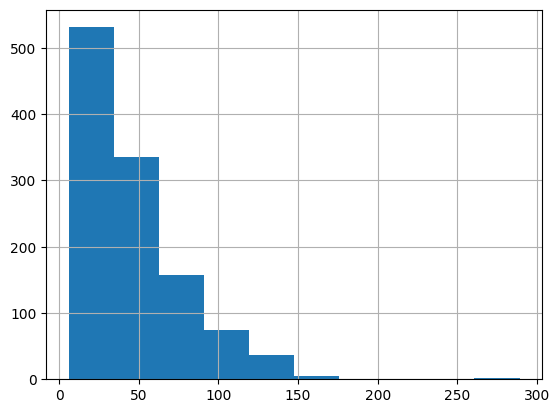

density


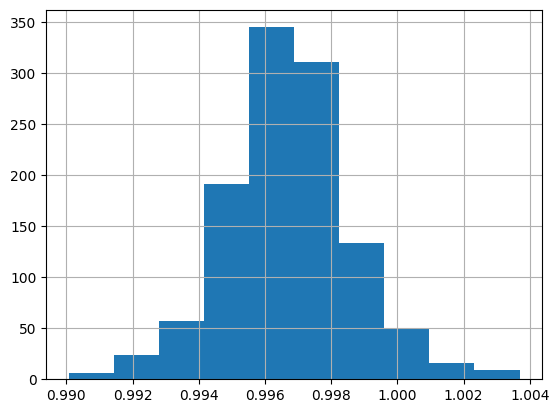

pH


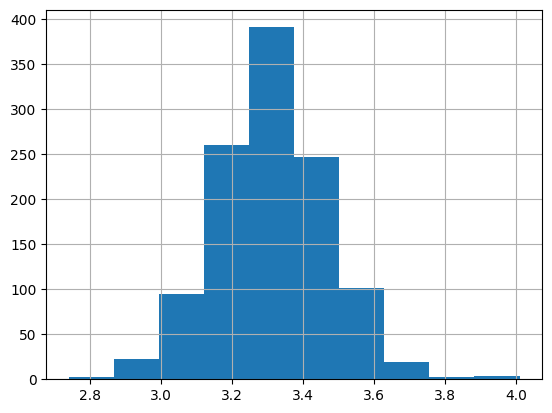

sulphates


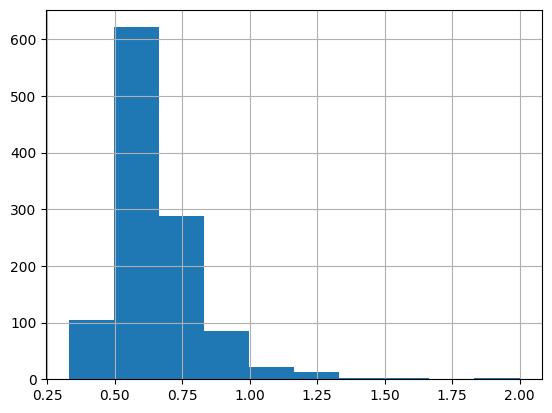

alcohol


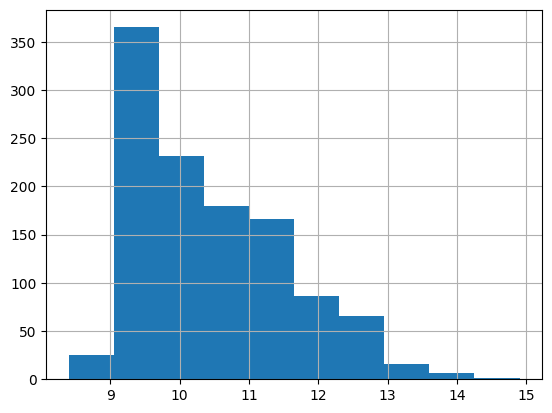

quality


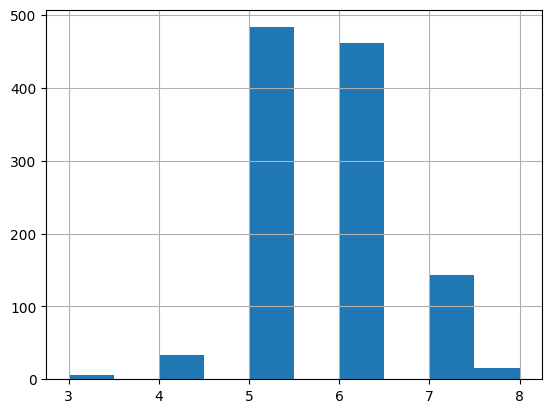

Id


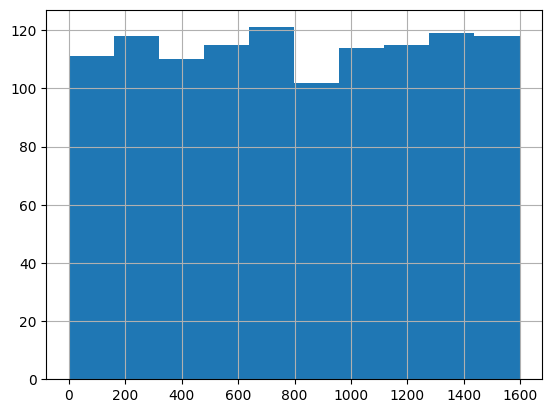

In [208]:
for columns in df:
    df[columns].hist()
    print(columns)
    plt.show()

## Det finns attributet id som inte behöver vara med när vi ska analysera datan

In [209]:
x = df.drop(columns=['quality','Id'])
y = df['quality']

In [210]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=30, random_state=35)

In [211]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(x_train, y_train)

In [212]:
clf.score(x_test,y_test)

0.6666666666666666

In [213]:
clf.feature_importances_

array([0.07441015, 0.13015082, 0.04563733, 0.05623652, 0.09078795,
       0.06251257, 0.1110553 , 0.0606541 , 0.06746349, 0.11375406,
       0.18733771])

In [214]:
clf.feature_names_in_

array(['fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol'],
      dtype=object)

In [215]:
print(f'Djupet på trädet är: {clf.get_depth()}')

print(f'Antalet löv: {clf.get_n_leaves()}')


Djupet på trädet är: 18
Antalet löv: 296


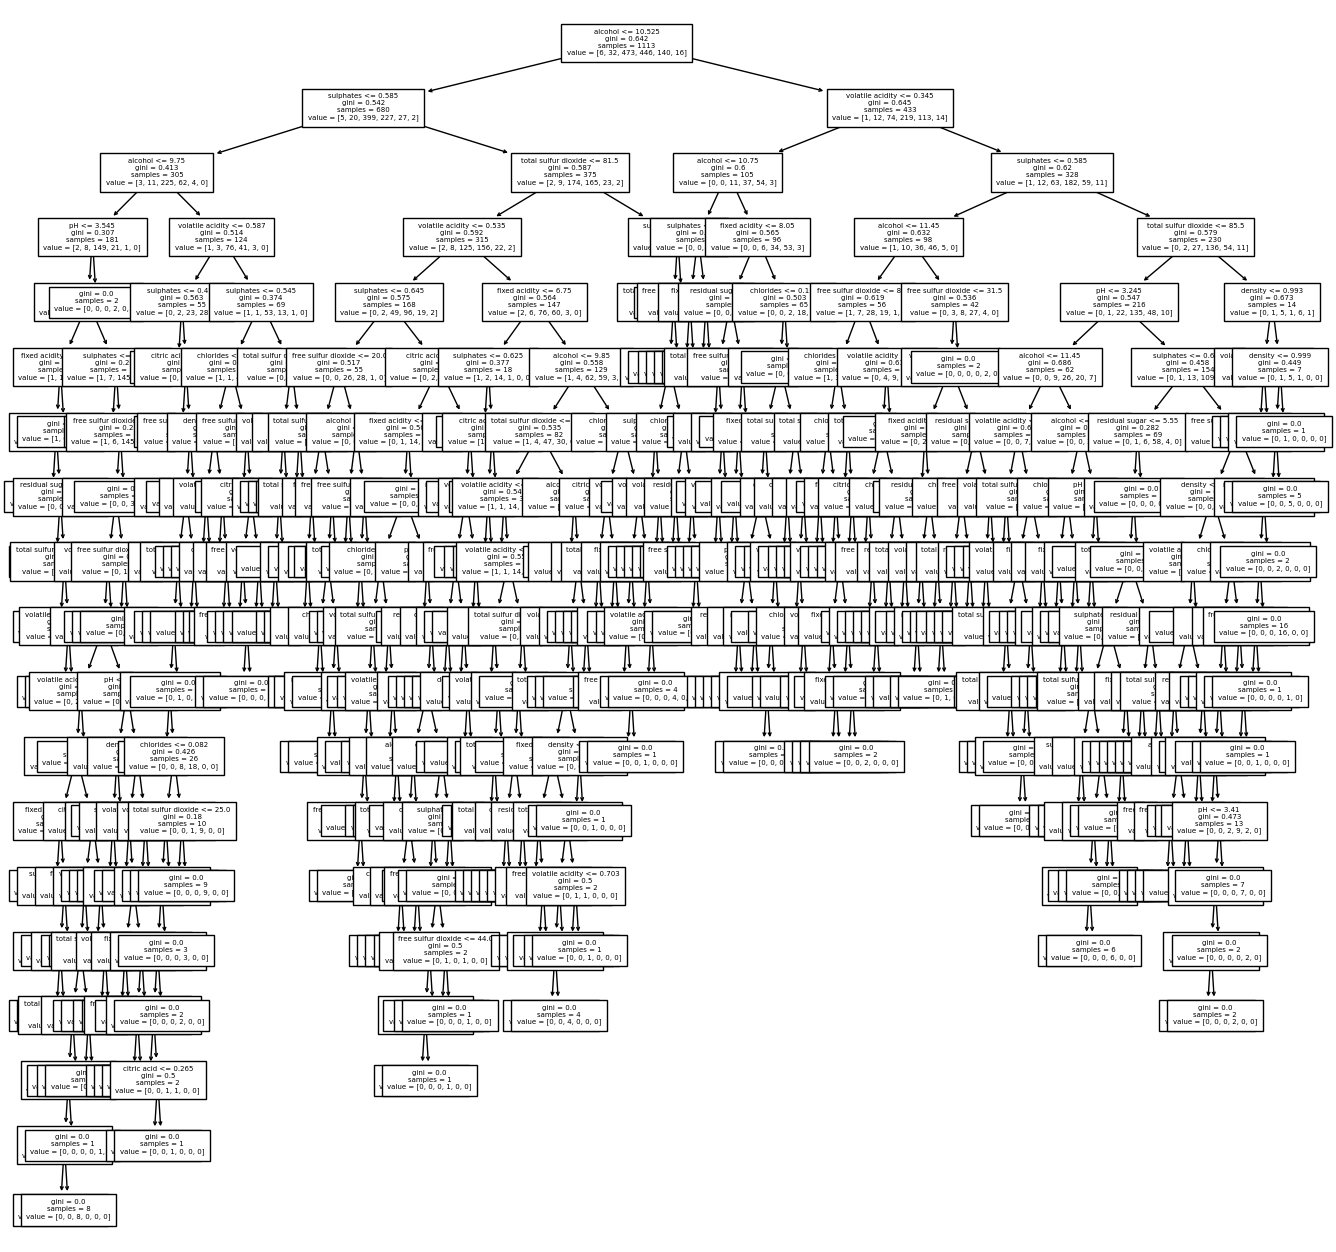

In [216]:
plt.figure(figsize=(16,16))  # set plot size (denoted in inches)
tree.plot_tree(clf,feature_names=clf.feature_names_in_ ,fontsize=5)
plt.show()

In [217]:
clf.max_features_

11

In [218]:
r = export_text(clf)
print(r)

|--- feature_10 <= 10.53
|   |--- feature_9 <= 0.58
|   |   |--- feature_10 <= 9.75
|   |   |   |--- feature_8 <= 3.54
|   |   |   |   |--- feature_10 <= 9.05
|   |   |   |   |   |--- feature_0 <= 10.75
|   |   |   |   |   |   |--- feature_7 <= 1.00
|   |   |   |   |   |   |   |--- class: 4
|   |   |   |   |   |   |--- feature_7 >  1.00
|   |   |   |   |   |   |   |--- feature_3 <= 1.85
|   |   |   |   |   |   |   |   |--- class: 5
|   |   |   |   |   |   |   |--- feature_3 >  1.85
|   |   |   |   |   |   |   |   |--- feature_6 <= 40.50
|   |   |   |   |   |   |   |   |   |--- class: 6
|   |   |   |   |   |   |   |   |--- feature_6 >  40.50
|   |   |   |   |   |   |   |   |   |--- feature_1 <= 0.42
|   |   |   |   |   |   |   |   |   |   |--- class: 6
|   |   |   |   |   |   |   |   |   |--- feature_1 >  0.42
|   |   |   |   |   |   |   |   |   |   |--- class: 5
|   |   |   |   |   |--- feature_0 >  10.75
|   |   |   |   |   |   |--- class: 3
|   |   |   |   |--- feature_10 >  9.05
|  